In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_excel("./Health_Checkup_Campaign.xlsx")

In [3]:
df.head()

,Reg_Code,Region,Area,Avg_HCI,Average BP_Sys,Average BP_Dias,height,Weight,Age,Male,Female
0,E12000009,South West,Tewkesbury,42.0056,115,72,1.81,86,38,62,33
1,E12000004,East Midlands,South Northamptonshire,52.4352,103,87,1.69,118,54,70,36
2,E12000009,South West,South Gloucestershire,44.5836,131,77,1.86,76,50,76,38
3,E12000008,South East,Guildford,42.7372,124,84,1.84,86,34,70,36
4,E12000004,East Midlands,Corby,45.8024,109,82,1.71,76,61,66,26


In [4]:
df.shape

(326, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reg_Code         326 non-null    object 
 1   Region           326 non-null    object 
 2   Area             326 non-null    object 
 3   Avg_HCI          326 non-null    float64
 4   Average BP_Sys   326 non-null    int64  
 5   Average BP_Dias  326 non-null    int64  
 6   height           326 non-null    float64
 7   Weight           326 non-null    int64  
 8   Age              326 non-null    int64  
 9   Male             326 non-null    int64  
 10  Female           326 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 28.1+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_HCI,326.0,47.798677,4.527006,37.0732,44.5365,47.6984,51.2535,58.2728
Average BP_Sys,326.0,121.214724,17.978018,90.0000,105.0000,122.0000,137.0000,150.0000
Average BP_Dias,326.0,85.168712,8.895586,70.0000,77.0000,85.5000,92.0000,100.0000
height,326.0,1.826840,0.085737,1.6700,1.7500,1.8200,1.9000,1.9800
Weight,326.0,95.539877,15.302989,70.0000,81.0000,95.0000,110.0000,120.0000
Age,326.0,47.705521,11.735250,28.0000,38.0000,49.0000,58.0000,67.0000
Male,326.0,66.027607,8.751747,50.0000,59.0000,66.0000,74.0000,80.0000
Female,326.0,29.441718,6.050656,20.0000,24.0000,29.0000,34.7500,40.0000


In [7]:
df['Region'].value_counts()

South East                  67
East                        47
East Midlands               40
North West                  39
South West                  37
London                      33
West Midlands               30
Yorkshire and The Humber    21
North East                  12
Name: Region, dtype: int64

<AxesSubplot:xlabel='height'>

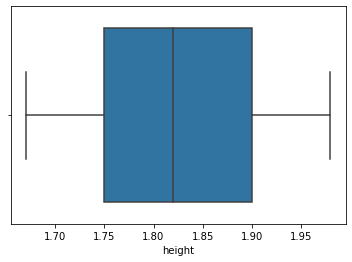

In [8]:
sns.boxplot(data=df,x='height')

<AxesSubplot:xlabel='Weight'>

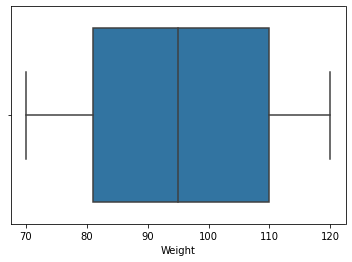

In [9]:
sns.boxplot(data=df,x='Weight')

<AxesSubplot:xlabel='Male'>

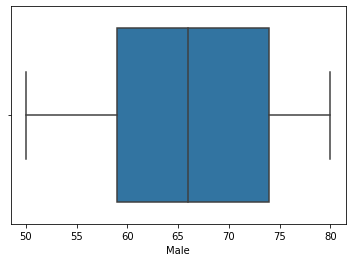

In [10]:
sns.boxplot(data=df,x='Male')

<AxesSubplot:xlabel='Female'>

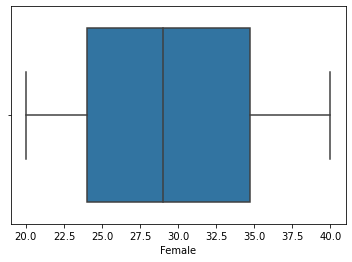

In [11]:
sns.boxplot(data=df,x='Female')

# PS 1: Identify the three most common regions with the highest proportion of male employees

In [12]:
x = df.groupby('Region')['Male'].mean()

In [13]:
x.sort_values(ascending=False).head(3)

Region
North East    68.666667
South East    68.164179
London        67.272727
Name: Male, dtype: float64

# PS 2: Create a new column ‘BMI’ in the data frame calculated as weight divided by the square of height and display the first five rows.

In [14]:
df['BMI'] = df['Weight'] / (df['height'] ** 2)

In [15]:
df.head(5)

,Reg_Code,Region,Area,Avg_HCI,Average BP_Sys,Average BP_Dias,height,Weight,Age,Male,Female,BMI
0,E12000009,South West,Tewkesbury,42.0056,115,72,1.81,86,38,62,33,26.250725
1,E12000004,East Midlands,South Northamptonshire,52.4352,103,87,1.69,118,54,70,36,41.315080
2,E12000009,South West,South Gloucestershire,44.5836,131,77,1.86,76,50,76,38,21.967858
3,E12000008,South East,Guildford,42.7372,124,84,1.84,86,34,70,36,25.401701
4,E12000004,East Midlands,Corby,45.8024,109,82,1.71,76,61,66,26,25.990903


# PS 3:Create a new column ‘BMI Category’ based on BMI values:
## - BMI lesser than 18.5 : Underweight
## - BMI is between 18.5 and 25 : Normal
## - BMI is between 25 and 30 : Overweight
## - BMI greater than 30 : Obese

In [16]:
def category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

In [17]:
df['BMI Category'] = df['BMI'].apply(category)

In [18]:
df.head()

,Reg_Code,Region,Area,Avg_HCI,Average BP_Sys,Average BP_Dias,height,Weight,Age,Male,Female,BMI,BMI Category
0,E12000009,South West,Tewkesbury,42.0056,115,72,1.81,86,38,62,33,26.250725,Overweight
1,E12000004,East Midlands,South Northamptonshire,52.4352,103,87,1.69,118,54,70,36,41.315080,Obese
2,E12000009,South West,South Gloucestershire,44.5836,131,77,1.86,76,50,76,38,21.967858,Normal
3,E12000008,South East,Guildford,42.7372,124,84,1.84,86,34,70,36,25.401701,Overweight
4,E12000004,East Midlands,Corby,45.8024,109,82,1.71,76,61,66,26,25.990903,Overweight


# PS 4: Calculate the average ‘Average HCI’ for each region

In [19]:
y = df.groupby('Region')['Avg_HCI'].mean()

In [20]:
y

Region
East                        48.441030
East Midlands               48.458620
London                      47.302570
North East                  46.247600
North West                  46.407538
South East                  48.551009
South West                  46.465589
West Midlands               48.768107
Yorkshire and The Humber    47.917048
Name: Avg_HCI, dtype: float64

# PS 5: Find the region with the highest average ‘Average HCI’ and display the corresponding details

In [21]:
df.sort_values(by='Avg_HCI',ascending=False).head(1)

,Reg_Code,Region,Area,Avg_HCI,Average BP_Sys,Average BP_Dias,height,Weight,Age,Male,Female,BMI,BMI Category
209,E12000005,West Midlands,Stratford-on-Avon,58.2728,140,87,1.68,118,66,54,33,41.80839,Obese


# PS 6: Calculate the average ‘Average HCI’ for employees aged between 30 and 40 in each region

In [22]:
z= df[(df['Age'] >= 30) & (df['Age'] <= 40)]

In [23]:
z.groupby('Region')['Avg_HCI'].mean()

Region
East                        45.400143
East Midlands               44.506178
London                      45.151829
North East                  43.563700
North West                  44.040089
South East                  45.282178
South West                  43.197200
West Midlands               46.236171
Yorkshire and The Humber    44.153333
Name: Avg_HCI, dtype: float64

# PS 7: Create a binary column 'High Blood Pressure' indicating whether an employee has high Blood pressure

In [24]:
df['High Blood Pressure'] = (df['Average BP_Sys'] > 130) | (df['Average BP_Dias'] > 80)

In [25]:
df.head()

,Reg_Code,Region,Area,Avg_HCI,Average BP_Sys,Average BP_Dias,height,Weight,Age,Male,Female,BMI,BMI Category,High Blood Pressure
0,E12000009,South West,Tewkesbury,42.0056,115,72,1.81,86,38,62,33,26.250725,Overweight,False
1,E12000004,East Midlands,South Northamptonshire,52.4352,103,87,1.69,118,54,70,36,41.315080,Obese,True
2,E12000009,South West,South Gloucestershire,44.5836,131,77,1.86,76,50,76,38,21.967858,Normal,True
3,E12000008,South East,Guildford,42.7372,124,84,1.84,86,34,70,36,25.401701,Overweight,True
4,E12000004,East Midlands,Corby,45.8024,109,82,1.71,76,61,66,26,25.990903,Overweight,True


# PS 8: Use the Average HCI as the target variable and build a linear regression model to predict the average HCI based on height, weight, male and female. Evaluate the model’s performance.

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [27]:
X = df[['height', 'Weight', 'Male', 'Female']]
y = df['Avg_HCI']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = model.predict(X_test)

In [31]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 12.568926777772756
